# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('J1.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,kalau saya sendiri lebih memilih menunggu tema...,F
1,menunggu,F
2,Jika ujian saya akan menunggu teman2 yang lain...,F
3,Mengulang ke soal no 1 smpe selesai selagi ada...,T
4,menunggu teman-teman yang lain selesai menjawa...,F
...,...,...
100,saya akan mengecek ulang hasil ulangan saya,T
101,Menunggu teman-teman yang lain selesai dan men...,F
102,"saya biasanya menunggu teman-teman yang lain, ...",F
103,sambil menunggu teman yang lainnya selesai men...,F


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,105,105
unique,100,2
top,menunggu,F
freq,2,71


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
F,71
T,34


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 93),
 ('teman', 76),
 ('menunggu', 61),
 ('akan', 52),
 ('yang', 44),
 ('jawaban', 29),
 ('lain', 27),
 ('dan', 25),
 ('selesai', 24),
 ('mengumpulkan', 24),
 ('dahulu', 23),
 ('terlebih', 23),
 ('waktu', 19),
 ('Saya', 19),
 ('kembali', 17),
 ('menjawab', 15),
 ('mengoreksi', 15),
 ('lebih', 14),
 ('Menunggu', 14),
 ('ada', 13),
 ('sudah', 13),
 ('jika', 12),
 ('teman-teman', 11),
 ('seluruh', 11),
 ('mengecek', 11),
 ('ujian', 10),
 ('untuk', 10),
 ('mengumpulkannya', 10),
 ('dengan', 9),
 ('ulang', 9),
 ('pertanyaan', 8),
 ('benar', 8),
 ('menit', 8),
 ('tersebut', 8),
 ('karena', 8),
 ('apakah', 7),
 ('tidak', 7),
 ('kalau', 6),
 ('lagi', 6),
 ('atau', 6),
 ('yakin', 6),
 ('sambil', 6),
 ('bisa', 5),
 ('soal', 5),
 ('Mengumpulkan', 5),
 ('itu', 5),
 ('dahulu,', 5),
 ('kita', 5),
 ('tetapi', 5),
 ('saat', 5),
 ('di', 5),
 ('telah', 5),
 ('baru', 4),
 ('tersisa', 4),
 ('habis', 4),
 ('saya,', 4),
 ('maka', 4),
 ('hasil', 4),
 ('lalu', 4),
 ('biasanya', 4),
 ('pertanyaan,', 

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,kalau saya sendiri lebih memilih menunggu tema...
1,menunggu
2,jika ujian saya akan menunggu teman2 yang lain...
3,mengulang ke soal no 1 smpe selesai selagi ada...
4,menunggu teman-teman yang lain selesai menjawa...
...,...
100,saya akan mengecek ulang hasil ulangan saya
101,menunggu teman-teman yang lain selesai dan men...
102,"saya biasanya menunggu teman-teman yang lain, ..."
103,sambil menunggu teman yang lainnya selesai men...


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,kalau saya sendiri lebih memilih menunggu tema...,F,kalau saya sendiri lebih memilih menunggu tema...,"[kalau, saya, sendiri, lebih, memilih, menungg...","[kalau, saya, sendiri, lebih, memilih, menungg...","[kalau, sendiri, lebih, memilih, menunggu, tem...",kalau sendiri lebih pilih tunggu temanteman lain,"[kalau, sendiri, lebih, pilih, tunggu, temante..."
1,menunggu,F,menunggu,[menunggu],[menunggu],[menunggu],tunggu,[tunggu]
2,jika ujian saya akan menunggu teman2 yang lain...,F,jika ujian saya akan menunggu teman yang lain ...,"[jika, ujian, saya, akan, menunggu, teman, yan...","[jika, ujian, saya, akan, menunggu, teman, yan...","[ujian, menunggu, teman, lain, selesai, menjaw...",uji tunggu teman lain selesai jawab seluruh ta...,"[uji, tunggu, teman, lain, selesai, jawab, sel..."
3,mengulang ke soal no 1 smpe selesai selagi ada...,T,mengulang ke soal no smpe selesai selagi ada w...,"[mengulang, ke, soal, no, smpe, selesai, selag...","[mengulang, ke, soal, tidak, smpe, selesai, se...","[mengulang, ke, soal, tidak, smpe, selesai, se...",ulang ke soal tidak smpe selesai selagi ada wa...,"[ulang, ke, soal, tidak, smpe, selesai, selagi..."
4,menunggu teman-teman yang lain selesai menjawa...,F,menunggu temanteman yang lain selesai menjawab...,"[menunggu, temanteman, yang, lain, selesai, me...","[menunggu, temanteman, yang, lain, selesai, me...","[menunggu, temanteman, lain, selesai, menjawab...",tunggu temanteman lain selesai jawab seluruh t...,"[tunggu, temanteman, lain, selesai, jawab, sel..."
...,...,...,...,...,...,...,...,...
100,saya akan mengecek ulang hasil ulangan saya,T,saya akan mengecek ulang hasil ulangan saya,"[saya, akan, mengecek, ulang, hasil, ulangan, ...","[saya, akan, mengecek, ulang, hasil, ulangan, ...","[mengecek, ulang, hasil, ulangan]",ecek ulang hasil ulang,"[ecek, ulang, hasil, ulang]"
101,menunggu teman-teman yang lain selesai dan men...,F,menunggu temanteman yang lain selesai dan meng...,"[menunggu, temanteman, yang, lain, selesai, da...","[menunggu, temanteman, yang, lain, selesai, da...","[menunggu, temanteman, lain, selesai, dan, men...",tunggu temanteman lain selesai dan ecek kembal...,"[tunggu, temanteman, lain, selesai, dan, ecek,..."
102,"saya biasanya menunggu teman-teman yang lain, ...",F,saya biasanya menunggu temanteman yang lain se...,"[saya, biasanya, menunggu, temanteman, yang, l...","[saya, biasanya, menunggu, temanteman, yang, l...","[biasanya, menunggu, temanteman, lain, setidak...",biasa tunggu temanteman lain tidak ada orang l...,"[biasa, tunggu, temanteman, lain, tidak, ada, ..."
103,sambil menunggu teman yang lainnya selesai men...,F,sambil menunggu teman yang lainnya selesai men...,"[sambil, menunggu, teman, yang, lainnya, seles...","[sambil, menunggu, teman, yang, lainnya, seles...","[sambil, menunggu, teman, lainnya, selesai, me...",sambil tunggu teman lain selesai jawab seluruh...,"[sambil, tunggu, teman, lain, selesai, jawab, ..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [kalau, saya, sendiri, lebih, memilih, menungg...
1                                           [menunggu]
2    [jika, ujian, saya, akan, menunggu, teman, yan...
3    [mengulang, ke, soal, tidak, smpe, selesai, se...
4    [menunggu, temanteman, yang, lain, selesai, me...
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","akan","yang","dengan","jika",]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [kalau, sendiri, lebih, memilih, menunggu, tem...
1                                             [menunggu]
2      [ujian, menunggu, teman, lain, selesai, menjaw...
3      [mengulang, ke, soal, tidak, smpe, selesai, se...
4      [menunggu, temanteman, lain, selesai, menjawab...
                             ...                        
100                    [mengecek, ulang, hasil, ulangan]
101    [menunggu, temanteman, lain, selesai, dan, men...
102    [biasanya, menunggu, temanteman, lain, setidak...
103    [sambil, menunggu, teman, lainnya, selesai, me...
104               [mengumpulkan, terlebih, dahulu, saja]
Name: indikator_filter, Length: 105, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

kalau sendiri lebih pilih tunggu temanteman lain
tunggu
uji tunggu teman lain selesai jawab seluruh tanya alas bisa koreksi uji lebih lama lagi manatau jawab ada kurang teliti sedang kalau tugas kumpul lebih dulu
ulang ke soal tidak smpe selesai selagi ada waktu guna untuk ecek lagi
tunggu temanteman lain selesai jawab seluruh tanya
kumpul lebih dahulu
tunggu teman
sambil tunggu jam habissaya koreksi jawab apakah sudah benar atau belum
kumpul lebih dahulu
biasa tunggu ada teman kumpul
tunggu temanteman lain
tunggu teman teman lain selesai jawab seluruh tanya
pikir lebih dahulu jawab belum benar benar yakin kumpul uji itu penting bagi
kumpul lebih dahulu
mengecheck jawab lebih dahulu dan yakin apakah tidak ada soal lewat sudah yakin baru kumpul jawab sebut
tunggu teman lain selesai jawab hal itu laku agar tidak buat teman lain rasa panik dan tetap fokus dalam uji
tunggu teman teman kumpul atau tunggu hingga sisa menit baru kumpul
tidak kumpul lebih dahulu kita bisa koreksi jawab lebih d

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[kalau, saya, sendiri, lebih, memilih, menungg...","[kalau, sendiri, lebih, memilih, menunggu, tem...","[kalau, sendiri, lebih, pilih, tunggu, temante..."
1,[menunggu],[menunggu],[tunggu]
2,"[jika, ujian, saya, akan, menunggu, teman, yan...","[ujian, menunggu, teman, lain, selesai, menjaw...","[uji, tunggu, teman, lain, selesai, jawab, sel..."
3,"[mengulang, ke, soal, tidak, smpe, selesai, se...","[mengulang, ke, soal, tidak, smpe, selesai, se...","[ulang, ke, soal, tidak, smpe, selesai, selagi..."
4,"[menunggu, temanteman, yang, lain, selesai, me...","[menunggu, temanteman, lain, selesai, menjawab...","[tunggu, temanteman, lain, selesai, jawab, sel..."
...,...,...,...
100,"[saya, akan, mengecek, ulang, hasil, ulangan, ...","[mengecek, ulang, hasil, ulangan]","[ecek, ulang, hasil, ulang]"
101,"[menunggu, temanteman, yang, lain, selesai, da...","[menunggu, temanteman, lain, selesai, dan, men...","[tunggu, temanteman, lain, selesai, dan, ecek,..."
102,"[saya, biasanya, menunggu, temanteman, yang, l...","[biasanya, menunggu, temanteman, lain, setidak...","[biasa, tunggu, temanteman, lain, tidak, ada, ..."
103,"[sambil, menunggu, teman, yang, lainnya, seles...","[sambil, menunggu, teman, lainnya, selesai, me...","[sambil, tunggu, teman, lain, selesai, jawab, ..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,kalau saya sendiri lebih memilih menunggu tema...,F,kalau saya sendiri lebih memilih menunggu tema...,"[kalau, saya, sendiri, lebih, memilih, menungg...","[kalau, saya, sendiri, lebih, memilih, menungg...","[kalau, sendiri, lebih, memilih, menunggu, tem...",kalau sendiri lebih pilih tunggu temanteman lain,"[kalau, sendiri, lebih, pilih, tunggu, temante..."
1,menunggu,F,menunggu,[menunggu],[menunggu],[menunggu],tunggu,[tunggu]
2,jika ujian saya akan menunggu teman2 yang lain...,F,jika ujian saya akan menunggu teman yang lain ...,"[jika, ujian, saya, akan, menunggu, teman, yan...","[jika, ujian, saya, akan, menunggu, teman, yan...","[ujian, menunggu, teman, lain, selesai, menjaw...",uji tunggu teman lain selesai jawab seluruh ta...,"[uji, tunggu, teman, lain, selesai, jawab, sel..."
3,mengulang ke soal no 1 smpe selesai selagi ada...,T,mengulang ke soal no smpe selesai selagi ada w...,"[mengulang, ke, soal, no, smpe, selesai, selag...","[mengulang, ke, soal, tidak, smpe, selesai, se...","[mengulang, ke, soal, tidak, smpe, selesai, se...",ulang ke soal tidak smpe selesai selagi ada wa...,"[ulang, ke, soal, tidak, smpe, selesai, selagi..."
4,menunggu teman-teman yang lain selesai menjawa...,F,menunggu temanteman yang lain selesai menjawab...,"[menunggu, temanteman, yang, lain, selesai, me...","[menunggu, temanteman, yang, lain, selesai, me...","[menunggu, temanteman, lain, selesai, menjawab...",tunggu temanteman lain selesai jawab seluruh t...,"[tunggu, temanteman, lain, selesai, jawab, sel..."


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

105

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
0,"(0, 93)\t0.25659158459111425\n (0, 168)\t0...."
0,"(0, 181)\t1.0"
0,"(0, 50)\t0.21599255051567817\n (0, 88)\t0.1..."
1,"(0, 51)\t0.22129017382125102\n (0, 186)\t0...."
0,"(0, 163)\t0.4571208248134986\n (0, 149)\t0...."
...,...
1,"(0, 64)\t0.506812056877263\n (0, 51)\t0.378..."
0,"(0, 18)\t0.4603966335905708\n (0, 136)\t0.3..."
0,"(0, 122)\t0.4765212254527527\n (0, 27)\t0.3..."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(78, 189) (78,) (27, 189) (27,)


In [ ]:
y

0      0
1      0
2      0
3      1
4      0
      ..
100    1
101    0
102    0
103    0
104    1
Name: type of encoding, Length: 105, dtype: int64

# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.9259259259259259)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(1.0, 0.9259259259259259)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.8888888888888888)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.9743589743589743, 0.8148148148148148)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.8205128205128205, 0.8888888888888888)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.8518518518518519)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9487179487179487, 0.9259259259259259)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
Random Forest,92.30
XG Boost,91.04
SGD,86.28
KNN,79.41
MNB,78.10
Logreg,75.10
SVM,71.84


In [ ]:
y_test.value_counts()

type of encoding
0    18
1     9
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,F,0
1,F,0
2,F,0
3,T,1
4,F,0
...,...,...
100,T,1
101,F,0
102,F,0
103,F,0


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# **RF Hyperparameter Tuning**

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1)
rf_improve_gridSearch.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}
Skor terbaik: 94.26638176638178


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# get a prediction
y_hat = rf.predict(X_train)
y_rf = rf.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_rf) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_rf) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_rf) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_rf) * 100)

Training set accuracy:  100.0
Test set accuracy:  73.91304347826086
Test set f1-score:  76.0
Test set precision:  73.07692307692307
Test set recall:  79.16666666666666


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        44
           1       0.73      0.79      0.76        48

    accuracy                           0.74        92
   macro avg       0.74      0.74      0.74        92
weighted avg       0.74      0.74      0.74        92



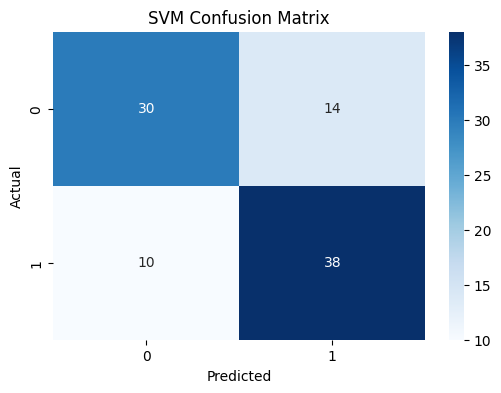

True Positives: 38
True Negatives: 30
False Positives: 10
False Negatives: 14


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_rf)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# RF SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning rf by f1 macro
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}
Skor terbaik: 96.48414648414648


# RF ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# define params for tuning rf by f1 macro
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 50}
Skor terbaik: 96.42623142623142


# RF TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning rf by f1 macro
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 3, 'n_estimators': 100}
Skor terbaik: 92.30924487019688


# RF RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning rf by f1 macro
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'n_estimators': 150}
Skor terbaik: 95.56759545923632


# Predict Testing

In [ ]:
list_indikator = np.array(data_clean['indikator_stemmed_tokens'])
list_tipe = np.array(data_clean['type of encoding'])

In [ ]:
cntizer = CountVectorizer(analyzer="word",max_features=1000, min_df = 0.01)
X_cnt = cntizer.fit_transform(list_indikator)

tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
X.shape

(126, 185)

In [ ]:
'''
Dataset baru
'''
# user_input = "saya akan ikut dengannya,karna tugas bisa dikerjakan besok paginya" #P
user_input = "menolak nya, karena harus segera dikumpulkan " #J
# user_input = "Mengerjakan terlebih dahulu lalu mengabari teman bahwa saya akan menyusul " #J
# user_input = "mungkin sy akan mengerjakan tugas sebelum / setelah bertemu dgn tmn" #P
# user_input = "mengerjakan terlebih dahulu lalu baru pergi bermain " #J

my_X_cnt = cntizer.transform(np.array([user_input]))

my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
result = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model = LogisticRegression(C = 0.001, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
# model.fit(X_train,y_train)
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(my_X_tfidf)
result.append(y_pred[0])


In [ ]:
if result == [0] :
  result_output = 'J'
else :
  result_output = 'P'

print(user_input)
print("The result is : ", result_output)



menolak nya, karena harus segera dikumpulkan 
The result is :  J


In [ ]:
y_test.value_counts()


In [ ]:
data_clean['Tipe'].value_counts()

# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('J1.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","akan","yang","dengan","jika",]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_J1.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_J1.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X

0      ['kalau', 'sendiri', 'lebih', 'pilih', 'tunggu...
1                                             ['tunggu']
2      ['uji', 'tunggu', 'teman', 'lain', 'selesai', ...
3      ['ulang', 'ke', 'soal', 'tidak', 'smpe', 'sele...
4      ['tunggu', 'temanteman', 'lain', 'selesai', 'j...
                             ...                        
100                  ['ecek', 'ulang', 'hasil', 'ulang']
101    ['tunggu', 'temanteman', 'lain', 'selesai', 'd...
102    ['biasa', 'tunggu', 'temanteman', 'lain', 'tid...
103    ['sambil', 'tunggu', 'teman', 'lain', 'selesai...
104                ['kumpul', 'lebih', 'dahulu', 'saja']
Name: indikator_stemmed_tokens, Length: 105, dtype: string

# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_J1.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","yang","dengan","jika",]

def stopword_removal (indikator) :
  filtering = stop_list
  x = []
  data = []
  def my_func(x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func, indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



tunggu teman agar dapat keluar kelas sama sama
menunggi ada teman kumpul lebih dahulu karena biar ada teman untuk kumpul
periksa jawab untuk pasti semua benar dan tidak ada salah jjika sudah yakin selesai baik kumpul jawab
tunggu salah satu teman kelas kumpul dan susul tetapi belum itu pasti jawab isi semua
cenderung tunggu teman teman lain karena sedikit kurang percaya diri juka harus kumpul di awal
tunggu teman teman lain selesai jawab karena sedikit takut untuk kumpul dahullu samping itu bisa cek kembali jawab
biasa tunggu beberapa orang selesai kumpul lebih dahulu karena tidak ingin terlalu lihat bagai orang sangat ambis
laku yaitu tunggu teman teman lain selesai jawab seluruh pertanyaa karena kumpul lebih dahulu buat teman teman hilang fokus dan konsentrasi
bakal tunggu teman teman lebih dahulu turut itu bentuk solidarotas ke teman


In [ ]:
dt.to_csv('J1_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load data X and y
X = joblib.load('X_J1.sav')
y = joblib.load('y_J1.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('J1_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []
sm = SMOTE()
# Train the model
X_sm, y_sm = sm.fit_resample(X, y)
model = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9, n_estimators=50)
model.fit(X_sm, y_sm)
# Save the model
joblib.dump(model, 'clf_J1.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('F')
    else:
        result.append('T')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


F
T
T
F
F
F
F
F
F


In [ ]:
pd.DataFrame(label)

,Tipe
0,F
1,F
2,T
3,F
4,F
5,F
6,F
7,F
8,F


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['tunggu', 'teman', 'agar', 'dapat', 'keluar',..."
1,"['menunggi', 'ada', 'teman', 'kumpul', 'lebih'..."
2,"['periksa', 'jawab', 'untuk', 'pasti', 'semua'..."
3,"['tunggu', 'salah', 'satu', 'teman', 'kelas', ..."
4,"['cenderung', 'tunggu', 'teman', 'teman', 'lai..."
5,"['tunggu', 'teman', 'teman', 'lain', 'selesai'..."
6,"['biasa', 'tunggu', 'beberapa', 'orang', 'sele..."
7,"['laku', 'yaitu', 'tunggu', 'teman', 'teman', ..."
8,"['bakal', 'tunggu', 'teman', 'teman', 'lebih',..."
